<a href="https://colab.research.google.com/github/TrungDong888/NhanDienHoa/blob/main/NhanDienHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

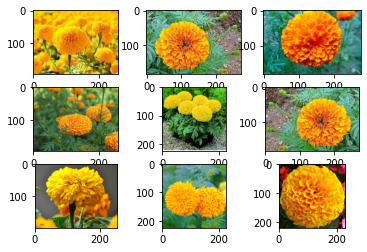

In [61]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Hoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'hoavantho'+str(i+0)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [62]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Hoa/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('hoacuc'+str(i+0)+'.jpg'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoamattroi'+str(i+0)+'.jpg'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoathuocduoc'+str(i+0)+'.jpg'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoavantho'+str(i+0)+'.jpg'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('4Hoa_photos.npy', photos)
save('4Hoa_labels.npy', labels)

(4, 150, 150, 3) (4,)


In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 811ms/step - loss: 496.5797 - accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 0s 187ms/step - loss: 5170.5645 - accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 190ms/step - loss: 4198.8066 - accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 197ms/step - loss: 1911.2100 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 181ms/step - loss: 1112.4236 - accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 0s 193ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 186ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 188ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 196ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 183ms/step - loss: 3.0683 - accura

In [65]:
model.evaluate(photos,labels)

1/1 [==============================] - 0s 321ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [66]:
model.save('4Hoa_Final.h5')

In [67]:
from keras.models import load_model
models=load_model('4Hoa_Final.h5')

In [68]:
classes = ["Cuc","Mat troi","Thuoc duoc","Van tho"]

In [73]:
classes = ["Cuc","Mat troi","Thuoc duoc","Van tho"]


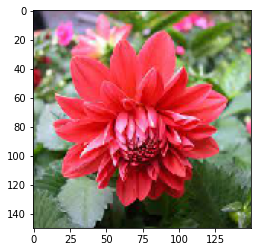

In [76]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Colab Notebooks/Hoa/hoathuocduoc4.jpg', target_size=(150,150))
plt.imshow(img)

In [77]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[4.2385262e-04 1.4595051e-02 9.8483539e-01 1.4572812e-04]]


'Thuoc duoc'